# Hand Pose Recognition for Music Control

In [18]:
import utils as u 

In [19]:
file_paths = ["../Data/data1.json", 
              "../Data/data2.json", 
              "../Data/data3.json", 
              "../Data/data4.json", 
              "../Data/data5.json", 
              "../Data/data6.json", 
              "../Data/data7.json",
              "../Data/data8.json",
              ]

x_data, y_data = u.load_data(file_paths) 
print(y_data) 

[1 1 1 ... 0 0 0]


In [20]:
x_data, y_data = u.shuffle_data(x_data, y_data, random_seed=20) 
print(y_data)

[0 1 1 ... 0 1 0]


In [21]:
split_idx = int(len(x_data) * 0.8)
x_train, y_train, x_test, y_test = u.split_data(x_data, y_data, split_idx)

In [22]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(564982, 63) (564982,) (141246, 63) (141246,)


In [23]:
x_train, y_train, x_val, y_val, x_test, y_test = u.preprocess_data(x_train, 
                                                                 y_train, 
                                                                 x_test, 
                                                                 y_test)

In [24]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(508484, 63) (508484,) (141246, 63) (141246,)


In [25]:
print(len(x_train.shape))
print(x_train.max())
print(x_train.min())

print(len(x_test.shape))
print(x_test.max())
print(x_test.min())

2
1.3344004154205322
-0.48810917139053345
2
1.3344004154205322
-0.48810917139053345


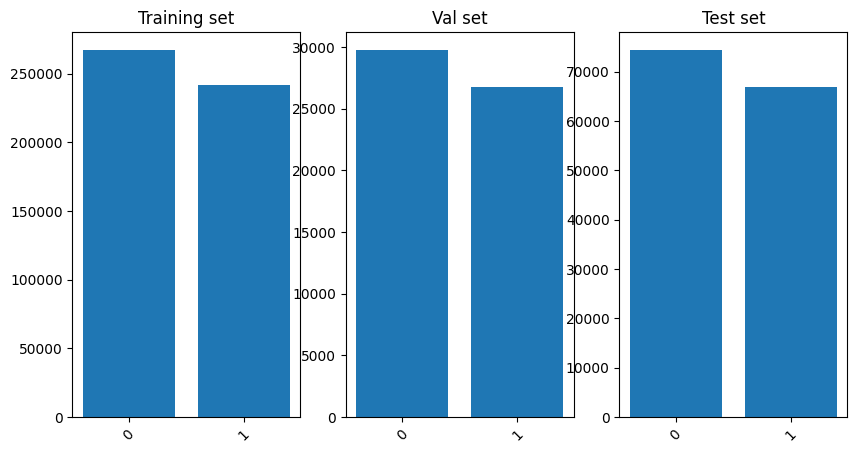

In [26]:
u.explore_data(x_train, y_train, y_test, y_val)

# I Build Baseline

In [27]:
baseline = u.build_baseline()


In [28]:
class_weights = {0: 0.9, 
                 1: 1} 

In [29]:
history, baseline = u.train_model(baseline, x_train, y_train, x_val, y_val, 
                      epochs=10, batch_size=32, class_weights=class_weights) 

Epoch 1/10
15891/15891 [==============================] - 21s 1ms/step - loss: 0.2899 - accuracy: 0.8556 - val_loss: 0.2397 - val_accuracy: 0.8598
Epoch 2/10
15891/15891 [==============================] - 19s 1ms/step - loss: 0.2207 - accuracy: 0.8684 - val_loss: 0.2178 - val_accuracy: 0.8800
Epoch 3/10
15891/15891 [==============================] - 19s 1ms/step - loss: 0.2081 - accuracy: 0.8724 - val_loss: 0.2188 - val_accuracy: 0.8674
Epoch 4/10
15891/15891 [==============================] - 18s 1ms/step - loss: 0.2015 - accuracy: 0.8740 - val_loss: 0.2115 - val_accuracy: 0.8817
Epoch 5/10
15891/15891 [==============================] - 18s 1ms/step - loss: 0.1974 - accuracy: 0.8749 - val_loss: 0.2020 - val_accuracy: 0.8794
Epoch 6/10
15891/15891 [==============================] - 20s 1ms/step - loss: 0.1940 - accuracy: 0.8763 - val_loss: 0.2013 - val_accuracy: 0.8782
Epoch 7/10
15891/15891 [==============================] - 18s 1ms/step - loss: 0.1915 - accuracy: 0.8773 - val_loss: 0

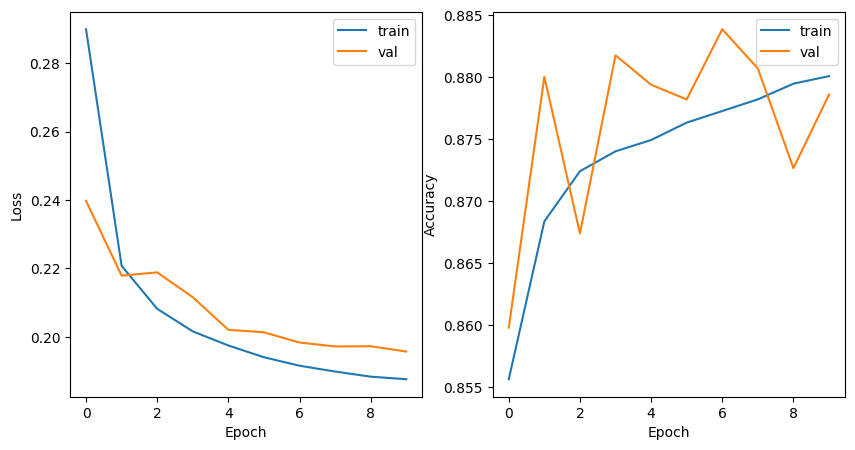

In [30]:
u.plot_loss(history)

# Baseline Evaluation

In [31]:
test_acc, y_pred = u.test_model(baseline, x_test, y_test)
print(y_pred)

4414/4414 [==============================] - 3s 670us/step
[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [0]]


In [32]:
from sklearn.metrics import classification_report
import numpy as np

# Predict labels for test data
y_pred = u.classify_handpose(baseline, x_test)

# Compute classification report
target_names = ["Target Handpose", "Not Target Handpose"]
report = classification_report(list(y_test), 
                               list(y_pred), 
                               target_names=target_names)

print(report)


4414/4414 [==============================] - 3s 713us/step
                     precision    recall  f1-score   support

    Target Handpose       0.86      0.93      0.89     74302
Not Target Handpose       0.91      0.83      0.87     66944

           accuracy                           0.88    141246
          macro avg       0.88      0.88      0.88    141246
       weighted avg       0.88      0.88      0.88    141246



In [37]:
# Classify handpose

# sample random handpose
idx = np.random.randint(0, len(y_test), size=1)[0] 
handpose_features = x_test[idx][np.newaxis, :] 
print('This handpose is not the target handpose.' if y_test[idx]==0 else 
      'This handpose is the target handpose.')

# Use your model to make predictions
y_pred = u.classify_handpose(baseline, handpose_features)

if y_pred[0] == 1:
    print('The model says this handpose is the target handpose.')
else:
    print('The model says this handpose is not the target handpose.')

This handpose is not the target handpose.
1/1 [==============================] - 0s 23ms/step
The model says this handpose is not the target handpose.


In [38]:
print(test_acc)

0.879670928734265


In [39]:
baseline.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                4096      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 2)                 66        
                                                                 
 dense_3 (Dense)             (None, 1)                 3         
                                                                 
Total params: 6245 (24.39 KB)
Trainable params: 6245 (24.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# II Build a Better Model

In [40]:
model = u.build_model()

In [43]:
class_weights = {0: 1, # o
                 1: 1} # n

In [44]:
history, model = u.train_model(model, x_train, y_train, x_val, y_val, 
                      epochs=30, batch_size=64, class_weights=class_weights)

Epoch 1/30
7946/7946 [==============================] - 9s 1ms/step - loss: 0.2019 - accuracy: 0.8794 - val_loss: 0.2023 - val_accuracy: 0.8751
Epoch 2/30
7946/7946 [==============================] - 9s 1ms/step - loss: 0.2001 - accuracy: 0.8806 - val_loss: 0.1989 - val_accuracy: 0.8760
Epoch 3/30
7946/7946 [==============================] - 9s 1ms/step - loss: 0.1992 - accuracy: 0.8808 - val_loss: 0.1985 - val_accuracy: 0.8828
Epoch 4/30
7946/7946 [==============================] - 9s 1ms/step - loss: 0.1981 - accuracy: 0.8817 - val_loss: 0.2017 - val_accuracy: 0.8781
Epoch 5/30
7946/7946 [==============================] - 9s 1ms/step - loss: 0.1975 - accuracy: 0.8815 - val_loss: 0.1965 - val_accuracy: 0.8791
Epoch 6/30
7946/7946 [==============================] - 10s 1ms/step - loss: 0.1970 - accuracy: 0.8814 - val_loss: 0.1949 - val_accuracy: 0.8840
Epoch 7/30
7946/7946 [==============================] - 12s 1ms/step - loss: 0.1966 - accuracy: 0.8822 - val_loss: 0.1953 - val_accurac

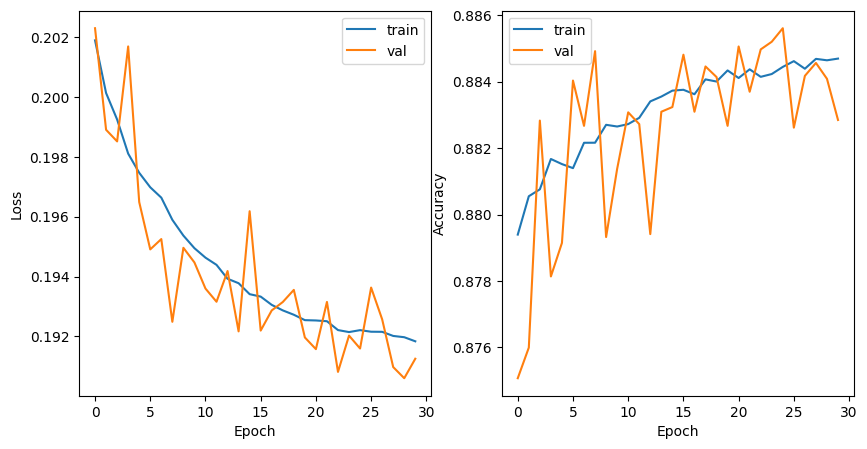

In [45]:
u.plot_loss(history)

# Model Evaluation

In [46]:
test_acc, y_pred = u.test_model(model, x_test, y_test)
print(y_pred)

4414/4414 [==============================] - 3s 692us/step
[[0]
 [0]
 [0]
 ...
 [0]
 [1]
 [1]]


In [47]:
from sklearn.metrics import classification_report
import numpy as np

# Predict labels for test data
y_pred = u.classify_handpose(model, x_test)

# Compute classification report
target_names = ["Target Handpose", "Not Target Handpose"]
report = classification_report(list(y_test), 
                               list(y_pred), 
                               target_names=target_names)

print(report)

4414/4414 [==============================] - 3s 679us/step
                     precision    recall  f1-score   support

    Target Handpose       0.84      0.96      0.90     74302
Not Target Handpose       0.95      0.80      0.87     66944

           accuracy                           0.88    141246
          macro avg       0.89      0.88      0.88    141246
       weighted avg       0.89      0.88      0.88    141246



In [57]:
# Classify handpose

# sample random handpose
idx = np.random.randint(0, len(y_test), size=1)[0] 
handpose_features = x_test[idx][np.newaxis, :] 
print('This handpose is not the target handpose.' if y_test[idx]==0 else 
      'This handpose is the target handpose.')

# Use your model to make predictions
y_pred = u.classify_handpose(baseline, handpose_features)

if y_pred[0] == 1:
    print('The model says this handpose is the target handpose.')
else:
    print('The model says this handpose is not the target handpose.')

This handpose is not the target handpose.
1/1 [==============================] - 0s 22ms/step
The model says this handpose is not the target handpose.


In [58]:
print(test_acc)

0.8834090876909788


In [59]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                4096      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 4757 (18.58 KB)
Trainable params: 4757 (18.58 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [60]:
model.save('./Handpose-Recognition.h5')

/Users/qianruzhang/anaconda3/envs/dl4m/lib/python3.8/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [61]:
!tensorflowjs_converter \
    --input_format=keras \
    --output_format=tfjs_graph_model \
    --saved_model_tags=serve \
    /Users/qianruzhang/Documents/GitHub/Machine-Learning-ML5/Week5-Real-Time-Handpose-Recognition/ML/Handpose-Recognition.keras \
    /Users/qianruzhang/Documents/GitHub/Machine-Learning-ML5/Week5-Real-Time-Posture-Recognition/tfjsmodel


Traceback (most recent call last):
  File "/Users/qianruzhang/anaconda3/envs/dl4m/bin/tensorflowjs_converter", line 8, in <module>
    sys.exit(pip_main())
  File "/Users/qianruzhang/anaconda3/envs/dl4m/lib/python3.8/site-packages/tensorflowjs/converters/converter.py", line 958, in pip_main
    main([' '.join(sys.argv[1:])])
  File "/Users/qianruzhang/anaconda3/envs/dl4m/lib/python3.8/site-packages/tensorflowjs/converters/converter.py", line 962, in main
    convert(argv[0].split(' '))
  File "/Users/qianruzhang/anaconda3/envs/dl4m/lib/python3.8/site-packages/tensorflowjs/converters/converter.py", line 948, in convert
    _dispatch_converter(input_format, output_format, args, quantization_dtype_map,
  File "/Users/qianruzhang/anaconda3/envs/dl4m/lib/python3.8/site-packages/tensorflowjs/converters/converter.py", line 634, in _dispatch_converter
    dispatch_keras_h5_to_tfjs_graph_model_conversion(
  File "/Users/qianruzhang/anaconda3/envs/dl4m/lib/python3.8/site-packages/tensorflowjs/co